<a href="https://colab.research.google.com/github/taneesha7/Tweet-Analysis-Ukraine-War/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("data.csv")
df = df[df.title.isin(['Comment'])]
df.reset_index(drop=True)
hold = np.array([df.iloc[0:20000, :], df.iloc[20000: 40000, :], df.iloc[40000: 60000, :], df.iloc[60000:,]])
hold[0] = pd.DataFrame(hold[0])
hold[1] = pd.DataFrame(hold[1])
hold[2] = pd.DataFrame(hold[2])
hold[3] = pd.DataFrame(hold[3])
print(len(hold[0]))
print(len(hold[1]))
print(len(hold[2]))
print(len(hold[3]))

20000
20000
20000
5877


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


1. Removed the urls, reduced the tweet from 90,000 to 75,000. 
2. Working on removing the stop words

In [ ]:
import nltk
import numpy as np
nltk.download('stopwords')
from nltk.corpus import stopwords
!pip install clean-text
from cleantext import clean


for x in hold:
  location = 0

  for i in x.itertuples():
    orig = i.body
    x.body[x.body == orig] = clean(i.body , no_urls=True,  no_emoji = True, no_punct = True, replace_with_url="")
    location = location + 1
    if location % 100 == 0:
      print(location, "\n")
  
print(len(hold[0].index))
print(len(hold[1].index))
print(len(hold[2].index))
print(len(hold[3].index))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 1.3 MB/s 
     |████████████████████████████████| 175 kB 9.7 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=91e5967750ae50f0a8085c03a5abebf2463d3e705ce90360a037f8b81f3ed54f
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


100 

200 

300 

400 

500 

600 

700 

800 

900 

1000 

1100 

1200 

1300 

1400 

1500 

1600 

1700 

1800 

1900 

2000 

2100 

2200 

2300 

2400 

2500 

2600 

2700 

2800 

2900 

3000 

3100 

3200 

3300 

3400 

3500 

3600 

3700 

3800 

3900 

4000 

4100 

4200 

4300 

4400 

4500 

4600 

4700 

4800 

4900 

5000 

5100 

5200 

5300 

5400 

5500 

5600 

5700 

5800 

5900 

6000 

6100 

6200 

6300 

6400 

6500 

6600 

6700 

6800 

6900 

7000 

7100 

7200 

7300 

7400 

7500 

7600 

7700 

7800 

7900 

8000 

8100 

8200 

8300 

8400 

8500 

8600 

8700 

8800 

8900 

9000 

9100 

9200 

9300 

9400 

9500 

9600 

9700 

9800 

9900 

10000 

10100 

10200 

10300 

10400 

10500 

10600 

10700 

10800 

10900 

11000 

11100 

11200 

11300 

11400 

11500 

11600 

11700 

11800 

11900 

12000 

12100 

12200 

12300 

12400 

12500 

12600 

12700 

12800 

12900 

13000 

13100 

13200 

13300 

13400 

13500 

13600 

13700 

13800 

1390

In [ ]:
from nltk.tokenize import word_tokenize
import string
import sys
stop_words = set(stopwords.words('english'))
nltk.download('punkt')
ind = 0
for x in hold:
  location = 0
  
  for i in x.itertuples():
    orig = i.body
    h = str(orig).encode(sys.stdout.encoding , errors = 'ignore').decode(sys.stdout.encoding)

    word_tokens = word_tokenize(h)
    
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    
    filtered_sentence = []
    
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
    sen = ""

    for word in filtered_sentence:
      sen += word + " "

    sen = sen.replace("�", "")

    
    for i in sen:
        
      # checking whether the char is printable value
      if i not in string.printable:
        sen = sen.replace(i, "")

    x.body[x.body == orig]  = sen
    location = location + 1
    if location % 100 == 0:
      print(ind , ": ", location, "\n")
  ind = ind + 1

print(len(hold[0].index))
print(len(hold[1].index))
print(len(hold[2].index))
print(len(hold[3].index))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0 :  100 

0 :  200 

0 :  300 

0 :  400 

0 :  500 

0 :  600 

0 :  700 

0 :  800 

0 :  900 

0 :  1000 

0 :  1100 

0 :  1200 

0 :  1300 

0 :  1400 

0 :  1500 

0 :  1600 

0 :  1700 

0 :  1800 

0 :  1900 

0 :  2000 

0 :  2100 

0 :  2200 

0 :  2300 

0 :  2400 

0 :  2500 

0 :  2600 

0 :  2700 

0 :  2800 

0 :  2900 

0 :  3000 

0 :  3100 

0 :  3200 

0 :  3300 

0 :  3400 

0 :  3500 

0 :  3600 

0 :  3700 

0 :  3800 

0 :  3900 

0 :  4000 

0 :  4100 

0 :  4200 

0 :  4300 

0 :  4400 

0 :  4500 

0 :  4600 

0 :  4700 

0 :  4800 

0 :  4900 

0 :  5000 

0 :  5100 

0 :  5200 

0 :  5300 

0 :  5400 

0 :  5500 

0 :  5600 

0 :  5700 

0 :  5800 

0 :  5900 

0 :  6000 

0 :  6100 

0 :  6200 

0 :  6300 

0 :  6400 

0 :  6500 

0 :  6600 

0 :  6700 

0 :  6800 

0 :  6900 

0 :  7000 

0 :  7100 

0 :  7200 

0 :  7300 

0 :  7400 

0 :  7500 

0 :  7600 

0 :  7700 

0 :  7800 

0 :  7900 

0 :  8000 

0 :  8100 

0 :  8200 

0 :  8300 

0 :  8400 

0

In [ ]:
#df = pd.DataFrame(hold[0]).append(pd.DataFrame(hold[1]).append(pd.DataFrame(hold[2]).append(pd.DataFrame(hold[3]))))
df = hold[0].append(hold[1].append(hold[2].append(hold[3])))
print(len(df.index))
df.to_csv('Cleaned_data.csv')
df.head()
#new file created, this is the cleaned data. When this is confirmed to be 100% cleaned, use this file

65877


,title,score,id,url,comms_num,created,body,timestamp
9,Comment,1,i1rqi48,NaN,0.0,1.648023e+09,told barbarians already event notwithstanding,3/23/2022 8:07
10,Comment,2,i1rqhy7,NaN,0.0,1.648023e+09,oh decathlon bad ordered,3/23/2022 8:07
11,Comment,7,i1rqhk0,NaN,0.0,1.648023e+09,last read commited almost combat ground forces,3/23/2022 8:07
12,Comment,1,i1rqhjy,NaN,0.0,1.648023e+09,lukashenko already president protests people p...,3/23/2022 8:07
13,Comment,3,i1rqhh1,NaN,0.0,1.648023e+09,russia,3/23/2022 8:07


In [ ]:
# import these modules
import pandas as pd
import threading
import numpy as np
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')


ps = PorterStemmer()

df = pd.read_csv("Cleaned_data.csv")
hold = np.array([df.iloc[0:10000, :], df.iloc[10000: 20000, :], df.iloc[20000: 30000, :], df.iloc[30000:40000, :], df.iloc[40000:50000, :], df.iloc[50000:60000, :], df.iloc[60000:, :] ])
hold[0] = pd.DataFrame(hold[0])
hold[1] = pd.DataFrame(hold[1])
hold[2] = pd.DataFrame(hold[2])
hold[3] = pd.DataFrame(hold[3])
hold[4] = pd.DataFrame(hold[4])
hold[5] = pd.DataFrame(hold[5])
hold[6] = pd.DataFrame(hold[6])

punc = '''!()-[]{};:'",<>./?@#$%^&*_~'''

for x in hold:
  location = 0
  for i in x.itertuples():
    test_str = ""
    orig = ""
    for ele in str(i.body):
      orig = i.body
      test_str = str(orig)
      if ele in punc:
        test_str = test_str.replace(ele, "")
    x.body[x.body == orig] = test_str
    location = location + 1
    if location % 1000 == 0:
      print(location)

for x in hold:
  location = 0
  for i in x.itertuples():
    orig = i.body
    to_be_stemmed = word_tokenize(str(i.body))
    stemmer = ""
    for w in to_be_stemmed:
      stemmer += ps.stem(w) + " "
    x.body[x.body == orig]  = stemmer
    location = location + 1
    if location % 100 == 0:
      print(location, "\n")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
1000
2000
3000
4000
5000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


100 

200 

300 

400 

500 

600 

700 

800 

900 

1000 

1100 

1200 

1300 

1400 

1500 

1600 

1700 

1800 

1900 

2000 

2100 

2200 

2300 

2400 

2500 

2600 

2700 

2800 

2900 

3000 

3100 

3200 

3300 

3400 

3500 

3600 

3700 

3800 

3900 

4000 

4100 

4200 

4300 

4400 

4500 

4600 

4700 

4800 

4900 

5000 

5100 

5200 

5300 

5400 

5500 

5600 

5700 

5800 

5900 

6000 

6100 

6200 

6300 

6400 

6500 

6600 

6700 

6800 

6900 

7000 

7100 

7200 

7300 

7400 

7500 

7600 

7700 

7800 

7900 

8000 

8100 

8200 

8300 

8400 

8500 

8600 

8700 

8800 

8900 

9000 

9100 

9200 

9300 

9400 

9500 

9600 

9700 

9800 

9900 

10000 

100 

200 

300 

400 

500 

600 

700 

800 

900 

1000 

1100 

1200 

1300 

1400 

1500 

1600 

1700 

1800 

1900 

2000 

2100 

2200 

2300 

2400 

2500 

2600 

2700 

2800 

2900 

3000 

3100 

3200 

3300 

3400 

3500 

3600 

3700 

3800 

3900 

4000 

4100 

4200 

4300 

4400 

4500 

46

In [ ]:
df = hold[0].append(hold[1].append(hold[2].append(hold[3].append(hold[4].append(hold[5].append(hold[6]))))))
print(len(df.index))
df.to_csv('stemmed_data.csv')

NameError: ignored

In [ ]:
import pandas as pd
from collections import Counter
sdf = pd.read_csv('sdf.csv')
sdf['body'].value_counts().idxmax()
# split_it = sdf.body.split()
body_list = sdf["body"].values.tolist()
body_list
# print(body_list[0].split())
#for i in range(len(body_list)):
#    body_list[i].split()
# for i in range(1000):
#   split_it = (str(body_list[i]).split())
  # Counter = Counter(split_it)
  # print(split_it)
#   body_list[i].split()
#most_occur = Counter.most_common(10)
flat_list = []
for response in body_list:
    for word in str(response).split():
        flat_list.append(word)
  
count = Counter(flat_list)
count.most_common(20)

[('russia', 12975),
 ('russian', 12959),
 ('ukrain', 10254),
 ('like', 9555),
 ('dont', 7920),
 ('would', 7812),
 ('war', 7132),
 ('peopl', 6218),
 ('get', 5974),
 ('one', 5561),
 ('think', 5272),
 ('go', 5210),
 ('putin', 5166),
 ('time', 5008),
 ('countri', 4780),
 ('even', 4724),
 ('>', 4428),
 ('us', 4418),
 ('use', 4354),
 ('make', 4218)]

21958
21959
21959
Period 1:


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  # Remove the CWD from sys.path while we load stuff.


[('russian', 4702),
 ('russia', 4291),
 ('ukrain', 3231),
 ('like', 3017),
 ('would', 2555),
 ('war', 2332),
 ('peopl', 2271),
 ('dont', 2132),
 ('get', 2043),
 ('think', 1928),
 ('one', 1909),
 ('putin', 1836),
 ('go', 1824),
 ('even', 1582),
 ('countri', 1567)]

7 words over time period 1:
Oil:  375
Embargo:  54
Gulag:  17
Sanction:  501
Ghost:  20
Genocide:  292
Conscript:  118


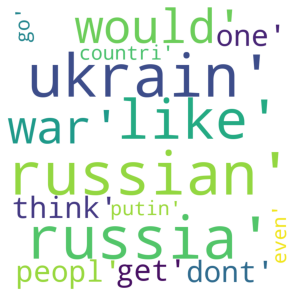

Period 2:


[('russia', 4429),
 ('russian', 4176),
 ('ukrain', 3447),
 ('like', 3005),
 ('would', 2736),
 ('war', 2450),
 ('dont', 2416),
 ('peopl', 2037),
 ('get', 1953),
 ('one', 1845),
 ('think', 1689),
 ('>', 1677),
 ('countri', 1654),
 ('go', 1645),
 ('putin', 1610)]

7 words over time period 2:
Oil:  334
Embargo:  45
Gulag:  17
Sanction:  318
Ghost:  30
Genocide:  310
Conscript:  108


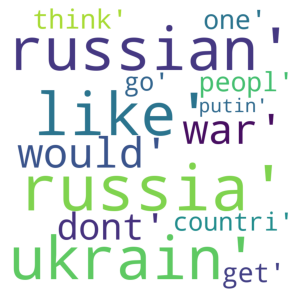

Period 3:


[('russia', 4254),
 ('russian', 4081),
 ('ukrain', 3576),
 ('like', 3533),
 ('dont', 3372),
 ('would', 2521),
 ('plea', 2433),
 ('war', 2350),
 ('time', 2106),
 ('get', 1978),
 ('peopl', 1910),
 ('comment', 1894),
 ('take', 1890),
 ('well', 1870),
 ('one', 1807)]

7 words over time period 3:
Oil:  246
Embargo:  32
Gulag:  12
Sanction:  278
Ghost:  19
Genocide:  136
Conscript:  91


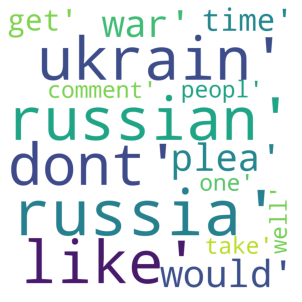

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from collections import Counter
from wordcloud import WordCloud
df = pd.read_csv("sdf.csv")
df = df[df.title.isin(['Comment'])]
df.reset_index(drop=True)
sdf = np.array([df.iloc[0:21958, :], df.iloc[21958: 43917, :], df.iloc[43917: 65876, :]])
sdf0 = pd.DataFrame(sdf[0])
sdf1 = pd.DataFrame(sdf[1])
sdf2 = pd.DataFrame(sdf[2])
#sdf3 = pd.DataFrame(sdf[3])
print(len(sdf0))
print(len(sdf1))
print(len(sdf2))
#print(len(sdf3))


print("Period 1:")

first_period = np.array([])

sdf0['body'].value_counts().idxmax()
body_list = sdf0["body"].values.tolist()
body_list


flat_list = []
for response in body_list:
    for word in str(response).split():
        flat_list.append(word)
  
count = Counter(flat_list)
display(count.most_common(15))

print("7 words over time period 1:")
print("Oil: ", count['Oil'] + count['oil'])
first_period = np.append(first_period, [count['Oil'] + count['oil']])

print("Embargo: ", count['Embargo'] + count['embargo'])
first_period = np.append(first_period, [count['Embargo'] + count['embargo']])

print("Gulag: ", count['Gulag'] + count['gulag'])
first_period = np.append(first_period, [count['Gulag'] + count['gulag']])

print("Sanction: ", count['Sanction'] + count['sanction'] + count['sanctions'] + count['Sanctions'])
first_period = np.append(first_period, [count['Sanction'] + count['sanction'] + count['sanctions'] + count['Sanctions']])

print("Ghost: ", count['Ghost'] + count['ghost'])
first_period = np.append(first_period, [count['Ghost'] + count['ghost']])

print("Genocide: ", count['Genocid'] + count['genocid'])
first_period = np.append(first_period, [count['Genocid'] + count['genocid']])

print("Conscript: ", count['Conscript'] + count['conscript'])
first_period = np.append(first_period, [count['Conscript'] + count['conscript']])


wordcloud1 = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(str(count.most_common(15)))

plt.imshow(wordcloud1)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()


print("Period 2:")

second_period = np.array([])

sdf1['body'].value_counts().idxmax()
# split_it = sdf.body.split()
body_list = sdf1["body"].values.tolist()
body_list


flat_list = []
for response in body_list:
    for word in str(response).split():
        flat_list.append(word)
  
count = Counter(flat_list)
display(count.most_common(15))

print("7 words over time period 2:")
print("Oil: ", count['Oil'] + count['oil'])
second_period = np.append(second_period, [count['Oil'] + count['oil']])

print("Embargo: ", count['Embargo'] + count['embargo'])
second_period = np.append(second_period, [count['Embargo'] + count['embargo']])

print("Gulag: ", count['Gulag'] + count['gulag'])
second_period = np.append(second_period, [count['Gulag'] + count['gulag']])

print("Sanction: ", count['Sanction'] + count['sanction'] + count['sanctions'] + count['Sanctions'])
second_period = np.append(second_period, [count['Sanction'] + count['sanction'] + count['sanctions'] + count['Sanctions']])

print("Ghost: ", count['Ghost'] + count['ghost'])
second_period = np.append(second_period, [count['Ghost'] + count['ghost']])

print("Genocide: ", count['Genocid'] + count['genocid'])
second_period = np.append(second_period, [count['Genocid'] + count['genocid']])

print("Conscript: ", count['Conscript'] + count['conscript'])
second_period = np.append(second_period, [count['Conscript'] + count['conscript']])


wordcloud2 = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(str(count.most_common(15)))

plt.imshow(wordcloud2)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

print("Period 3:")

third_period = np.array([])

sdf2['body'].value_counts().idxmax()
# split_it = sdf.body.split()
body_list = sdf2["body"].values.tolist()
body_list


flat_list = []
for response in body_list:
    for word in str(response).split():
        flat_list.append(word)
  
count = Counter(flat_list)
display(count.most_common(15))

print("7 words over time period 3:")
print("Oil: ", count['Oil'] + count['oil'])
third_period = np.append(third_period, [count['Oil'] + count['oil']])

print("Embargo: ", count['Embargo'] + count['embargo'])
third_period  = np.append(third_period, [count['Embargo'] + count['embargo']])

print("Gulag: ", count['Gulag'] + count['gulag'])
third_period  = np.append(third_period, [count['Gulag'] + count['gulag']])

print("Sanction: ", count['Sanction'] + count['sanction'] + count['sanctions'] + count['Sanctions'])
third_period  = np.append(third_period, [count['Sanction'] + count['sanction'] + count['sanctions'] + count['Sanctions']])

print("Ghost: ", count['Ghost'] + count['ghost'])
third_period  = np.append(third_period, [count['Ghost'] + count['ghost']])

print("Genocide: ", count['Genocid'] + count['genocid'])
third_period  = np.append(third_period, [count['Genocid'] + count['genocid']])

print("Conscript: ", count['Conscript'] + count['conscript'])
third_period  = np.append(third_period, [count['Conscript'] + count['conscript']])


wordcloud3 = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(str(count.most_common(15)))

plt.imshow(wordcloud3)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
import pandas as pd


df = pd.read_csv("data.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp',inplace=True)

df = pd.get_dummies(df["body"].str.split(),prefix_sep=' ', sparse=True)
df = df.resample('1D').sum()

TypeError: ignored

In [ ]:
df.head()

,$ 1 billion could probabl give 200 000 ukrainian good auto assault rifl good handgun 1000 round ammo backpack essenti includ 20 000 calori food good mountain bike clean mainten simpl repair kit gun bike itd unlik 1000 russian sam would get 1,$ 1 billion putin head thatll less costli war drag,$ 1350 usd,$ 200000000 usd give ukrain put info back,$ 25bn putin doesnt much much much much think order magnitud thought scale hardli matter,$ 8bn one month essenti $ 100bn year us spent $ 780bn direct cost war iraq 7 year us pace spend iraq despit pay soldier wage think could give thousand bradley though,069 sex educ putin,1,1 2 wont make differ accord articl report sake report,1 20 russian soldier suffer lack suffici ukrainian mortar click donat ukrainian mortar thump foundat russian soldier equal opportun receiv gift shape charg,...,zero chanc would give t14 separatist would unquestion tie russia also advanc combat vehicl wouldnt throw away like,zero incent fight nato howev nato us resourc tie europ mean free pursu territori ambit,zero team,zhukov almost got kill multipl time one main reason zhukov promis cancel stateown farm system,zinc plenti antibacteri long last cheap effect way preserv bodi box,zionist isra nationalist often littl jewish faith peopl howev long histori thing thier treatment palestinian biggest exampl,zolksturm time appar end wors russia,zz top got hit,~22k+ src wiki ~4 ys ago,~48 per bu
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-03-23,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,1,0,1,0,0
2022-03-24,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2022-03-25,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-03-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2022-03-27,0,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


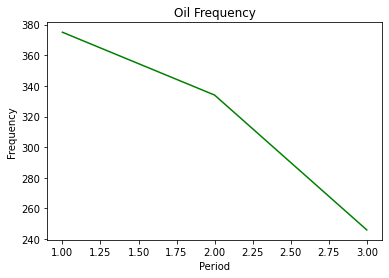

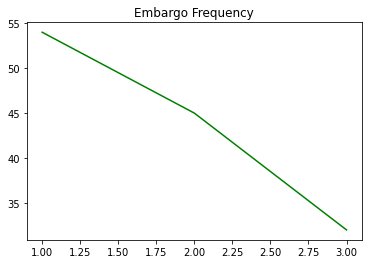

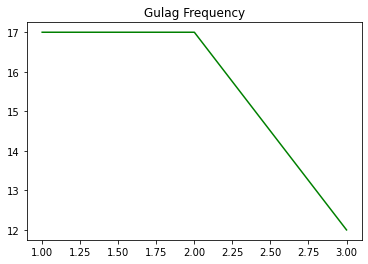

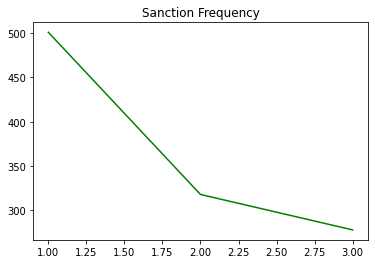

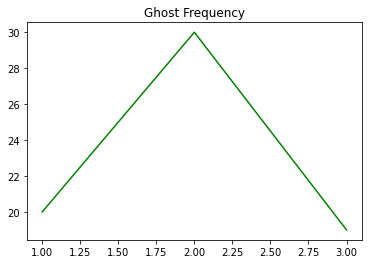

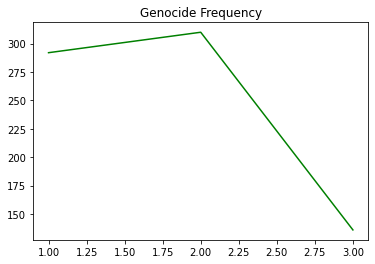

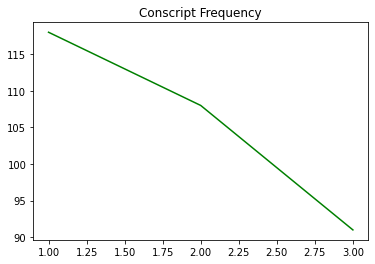

In [ ]:
from warnings import filters
period_points = np.array([1,2,3])

import matplotlib.pyplot as plt

#Oil:  246
#Embargo:  32
#Gulag:  12
#Sanction:  278
#Ghost:  19
#Genocide:  136
#Conscript:  91

plt.title("Oil Frequency")
plt.xlabel("Period")
plt.ylabel("Frequency")
plt.plot(period_points, [first_period[0], second_period[0], third_period[0]], color ="green")
plt.show()

plt.title("Embargo Frequency")
plt.plot(period_points, [first_period[1], second_period[1], third_period[1]], color ="green")
plt.show()

plt.title("Gulag Frequency")
plt.plot(period_points, [first_period[2], second_period[2], third_period[2]], color ="green")
plt.show()

plt.title("Sanction Frequency")
plt.plot(period_points, [first_period[3], second_period[3], third_period[3]], color ="green")
plt.show()

plt.title("Ghost Frequency")
plt.plot(period_points, [first_period[4], second_period[4], third_period[4]], color ="green")
plt.show()

plt.title("Genocide Frequency")
plt.plot(period_points, [first_period[5], second_period[5], third_period[5]], color ="green")
plt.show()

plt.title("Conscript Frequency")
plt.plot(period_points, [first_period[6], second_period[6], third_period[6]], color ="green")
plt.show()

